In [2]:
import pandas as pd

In [3]:
data=pd.read_csv("/Users/kylehammerberg/ARIMA_project/ps4_s22.txt", sep=" ")

In [4]:
print(data)

           y1        y2        y3         y4        y5
0    1.195625  0.158617 -0.090410   5.819983  18.61971
1    1.508967  1.501712  1.903155   6.674314  20.62647
2    0.966198  0.339616  1.323105   9.024976  18.77138
3   -1.109833  0.691035 -0.284469  10.461910  21.91270
4    0.507588  2.420454  0.439059  10.268280  23.47152
..        ...       ...       ...        ...       ...
295 -0.191774  2.356727 -1.958925   3.377905  64.80188
296 -0.039747  1.681248  1.095567   3.780187  68.75152
297 -0.208815  2.604393  2.487666   6.238284  68.85428
298 -0.041686  4.653301  1.113322   8.288638  68.86370
299  1.149897  7.146871 -1.289495   8.823721  70.90999

[300 rows x 5 columns]


In [5]:
series_1=data['y1']
series_2=data['y2']
series_3=data['y3']
series_4=data['y4']
series_5=data['y5']

In [6]:
print(series_2)

0      0.158617
1      1.501712
2      0.339616
3      0.691035
4      2.420454
         ...   
295    2.356727
296    1.681248
297    2.604393
298    4.653301
299    7.146871
Name: y2, Length: 300, dtype: float64


In [7]:
series_1.shape

(300,)

<AxesSubplot:xlabel='t', ylabel='y-axis'>

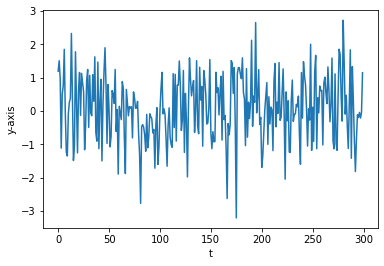

In [8]:
import matplotlib.pyplot as plt
series_1.plot(y='A', use_index=True, xlabel='t',ylabel='y-axis')


<AxesSubplot:>

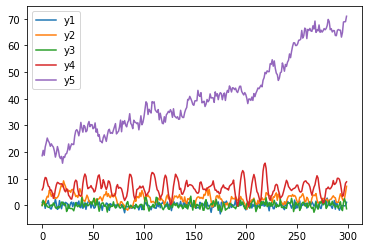

In [9]:
data.plot()

In [10]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [11]:
# creating arrays of series values for adfuller
s1 = series_1.iloc[:,].to_numpy()
s2 = series_2.iloc[:,].to_numpy()
s3 = series_3.iloc[:,].to_numpy()
s4 = series_4.iloc[:,].to_numpy()
s5 = series_5.iloc[:,].to_numpy()
print(s1)
type(s1)
s1.dtype

[ 1.195625    1.508967    0.9661981  -1.109833    0.507588    0.7684451
  1.85109    -0.04465215 -1.232833   -1.344062   -0.07983586  0.2674269
  0.3815132   2.327001    0.443599   -1.479743   -1.030429    1.776269
  0.2492342  -1.251271    0.6448405   1.157833   -0.1264754   1.127637
  0.8372688   0.5710049  -1.157834   -0.4220602   0.9316286   1.245968
 -0.4885078   1.070641   -0.06267477 -0.1387906   1.093306    0.2930097
  1.625433   -0.6426549  -0.9006089   1.467915   -1.124766    0.3034895
  0.9531767  -1.491342    0.2009875   1.160643    1.898406    0.7804782
 -0.968438    0.7949289   0.01788349 -1.072593   -0.7493546   0.615205
  0.5088806   0.2307213   1.248687   -0.6111132   0.04236474 -1.887368
  0.1467658  -0.04780457 -0.2561475   0.8828577   0.6818035  -0.7937602
 -1.869709    0.6504543   0.2544906  -0.140769    0.1365793   0.09459386
  0.1287915  -0.8032435   0.5751813   0.400711    0.0856536   0.09180343
  0.2895603  -0.6652571  -1.308579   -2.763126   -0.463427   -0.404

dtype('float64')

In [12]:

#Testing for stationarity using ADF and KPSS Tests.

def stationarity_test(series_df, series_array):
    # Calculating rolling mean and rolling standard deviation:
    rolling_mean = series_df.rolling(10).mean()
    rolling_std_dev = series_df.rolling(10).std()
  
    # Plotting the statistics:
    plt.figure(figsize=(24,6))
    plt.plot(rolling_mean, color='blue', label='Rolling Mean')
    plt.plot(rolling_std_dev, color='green', label = 'Rolling Std Dev')
    plt.plot(series_df, color='red',label='Original Time Series')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    
    print("ADF Test:")
    adf_test = adfuller(series_array, autolag='AIC')
    print('Null Hypothesis: Not Stationary')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))

    print("KPSS Test:")
    kpss_test = kpss(series_array, regression='c', nlags=0, store=False)
    print('Null Hypothesis: Stationary')
    print('KPSS Statistic: %f' % kpss_test[0])
    print('p-value: %f' % kpss_test[1])
    print('Critical Values:')
    for key, value in kpss_test[3].items():
        print('\t%s: %.3f' % (key, value))
    


ADF and KPSS Results for S1


ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -15.418928
p-value: 0.000000
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 0.234644
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


---------------------


ADF and KPSS Results for S2
ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -5.571125
p-value: 0.000001
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 1.690649
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


---------------------


ADF and KPSS Results for S3
ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -5.273477
p-value: 0.000006
Critical Values:
	1%: -3.453
	5%: -2.872
	10%: -2.572
KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 0.147371
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


----

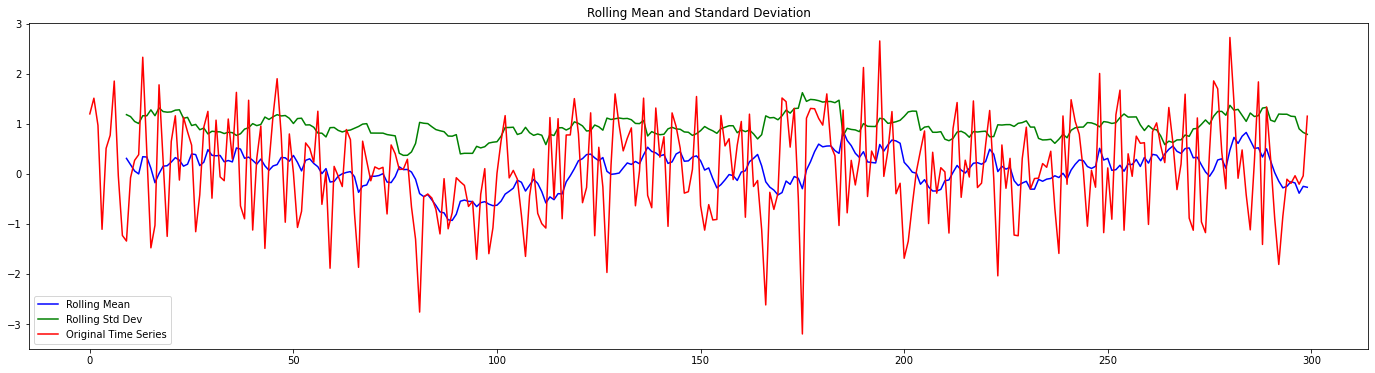

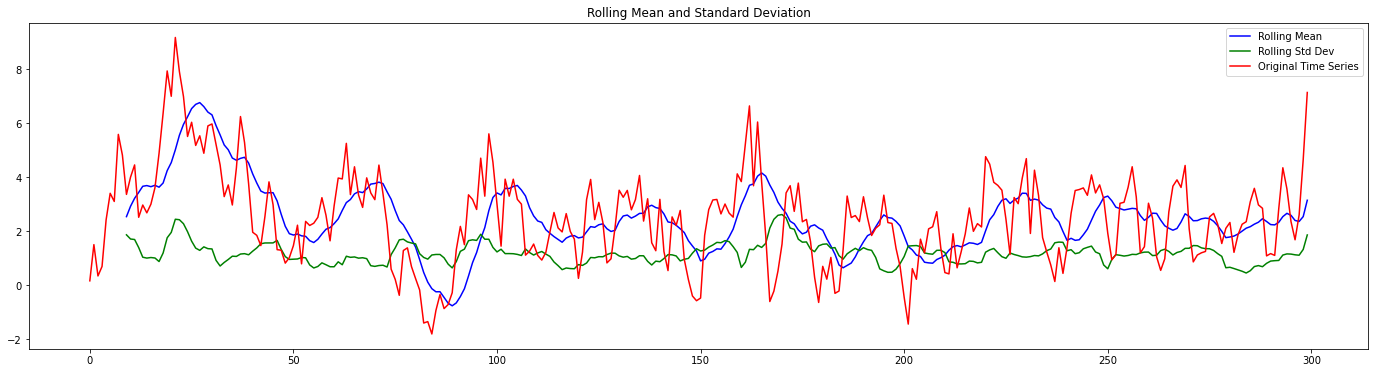

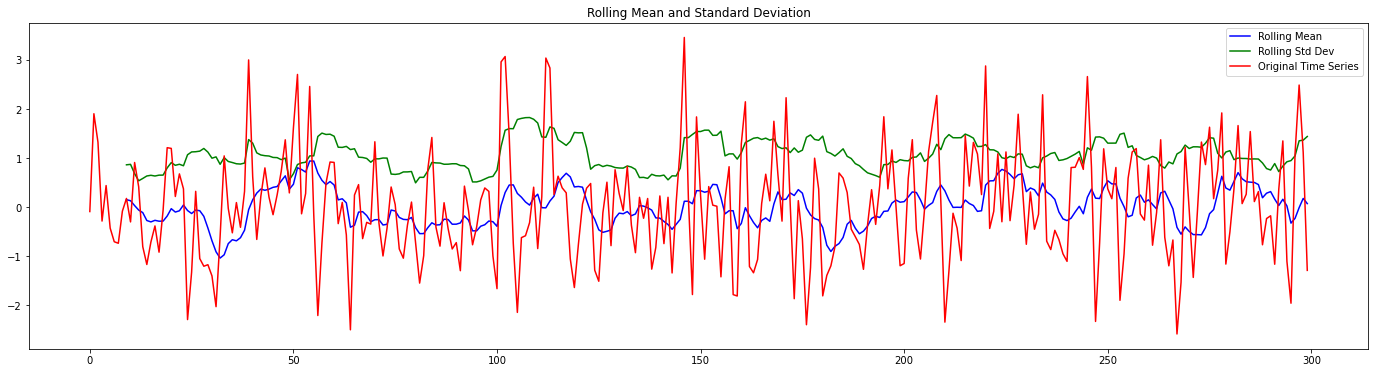

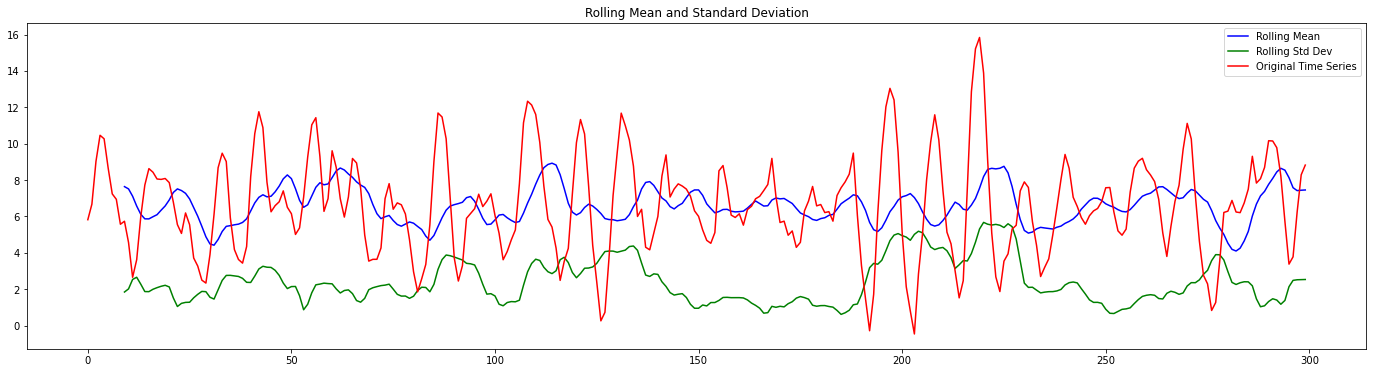

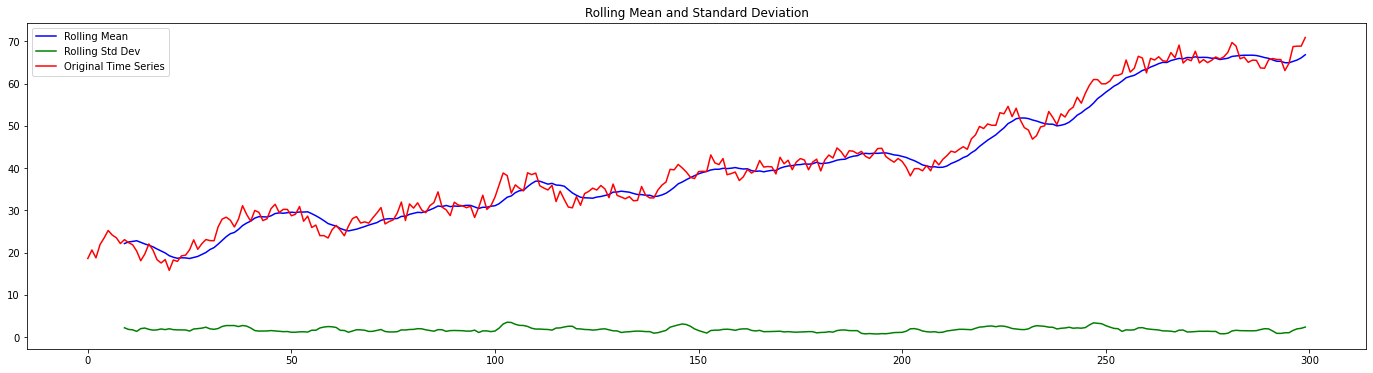

In [16]:
%matplotlib inline
print("ADF and KPSS Results for S1")
print("\n")
stationarity_test(series_1,s1)
print("\n")
print("---------------------")
print("\n")
print("ADF and KPSS Results for S2")
stationarity_test(series_2,s2)
print("\n")
print("---------------------")
print("\n")
print("ADF and KPSS Results for S3")
stationarity_test(series_3,s3)
print("\n")
print("---------------------")
print("\n")
print("ADF and KPSS Results for S4")
stationarity_test(series_4,s4)
print("\n")
print("---------------------")
print("\n")
print("ADF and KPSS Results for S5")
stationarity_test(series_5,s5)

In [13]:

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

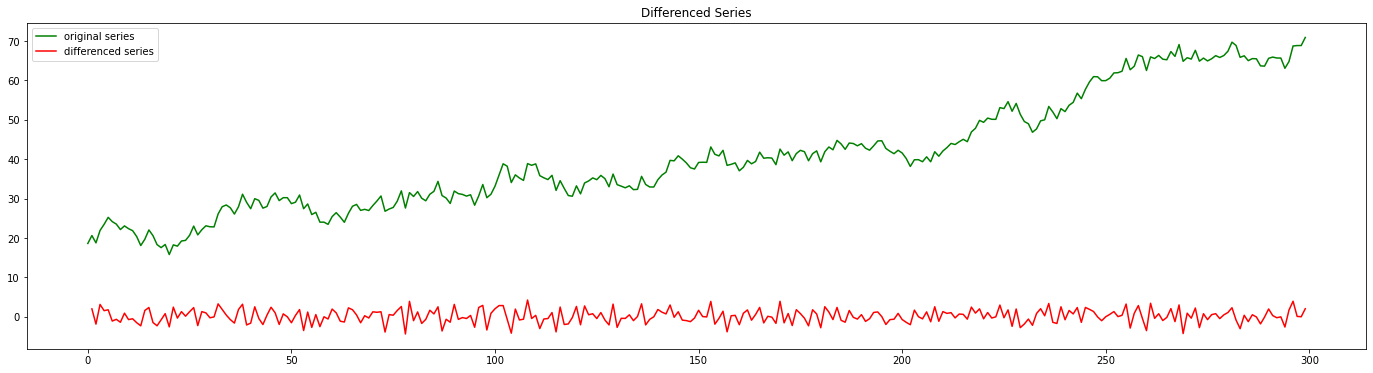

In [14]:
# Differencing the non-stationary series and then plotting the new series
import numpy as np
d_list = difference(series_5)
d_array = np.array(d_list)

    
x = np.arange(1,300)
y = d_array
plt.figure(figsize=(24,6))
plt.title('Differenced Series')
plt.plot(series_5, color='green', label='original series')
plt.plot(x,y, color = 'red', label='differenced series')
plt.legend(loc='best')
plt.show()

Series 1 Autocorrelation and Partial Autocorrelations


---------------------




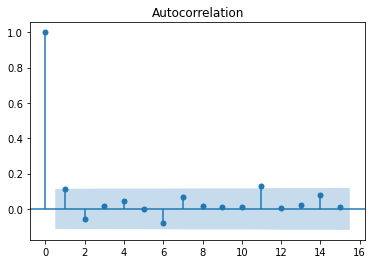

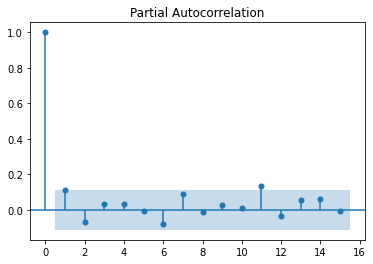

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

print("Series 1 Autocorrelation and Partial Autocorrelations")
acf_1 = plot_acf(series_1.values.squeeze(), lags=15)
pacf_1 = plot_pacf(series_1.values.squeeze(), lags=15)
print("\n")
print("---------------------")
print("\n")


Series 2 Autocorrelation and Partial Autocorrelations


---------------------




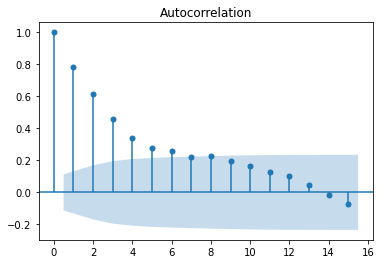

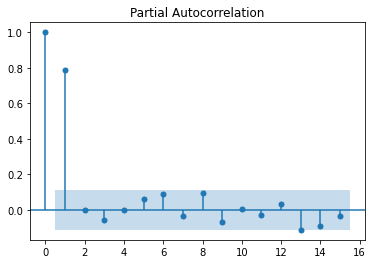

In [16]:
print("Series 2 Autocorrelation and Partial Autocorrelations")
acf_1 = plot_acf(series_2.values.squeeze(), lags=15)
pacf_1 = plot_pacf(series_2.values.squeeze(), lags=15)
print("\n")
print("---------------------")
print("\n")


Series 3 Autocorrelation and Partial Autocorrelations


---------------------




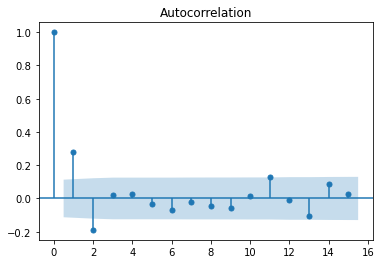

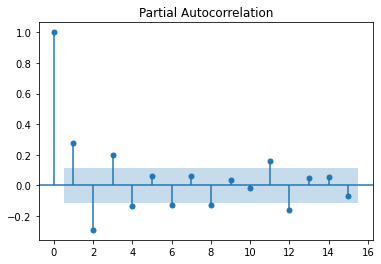

In [17]:
print("Series 3 Autocorrelation and Partial Autocorrelations")
acf_1 = plot_acf(series_3.values.squeeze(), lags=15)
pacf_1 = plot_pacf(series_3.values.squeeze(), lags=15)
print("\n")
print("---------------------")
print("\n")


Series 4 Autocorrelation and Partial Autocorrelations


---------------------




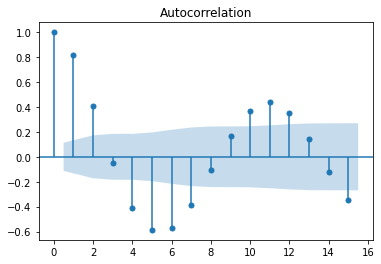

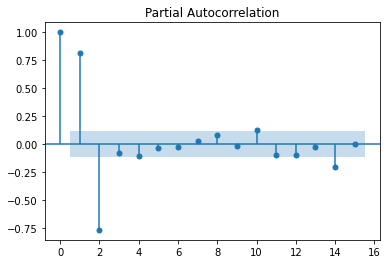

In [18]:
print("Series 4 Autocorrelation and Partial Autocorrelations")
acf_1 = plot_acf(series_4.values.squeeze(), lags=15)
pacf_1 = plot_pacf(series_4.values.squeeze(), lags=15)
print("\n")
print("---------------------")
print("\n")


Series 5 Autocorrelation and Partial Autocorrelations


---------------------




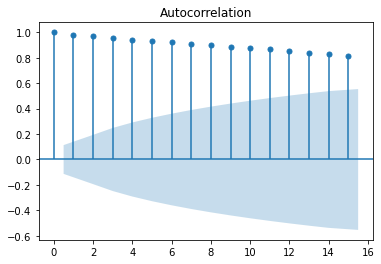

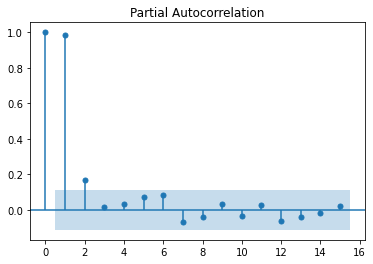

In [19]:
print("Series 5 Autocorrelation and Partial Autocorrelations")
acf_1 = plot_acf(series_5.values.squeeze(), lags=15)
pacf_1 = plot_pacf(series_5.values.squeeze(), lags=15)
print("\n")
print("---------------------")
print("\n")


Series 5 Autocorrelation and Partial Autocorrelations


---------------------




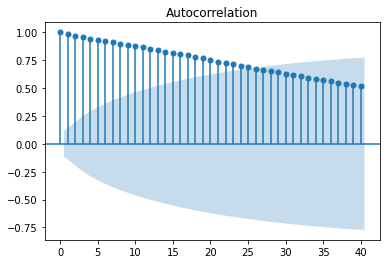

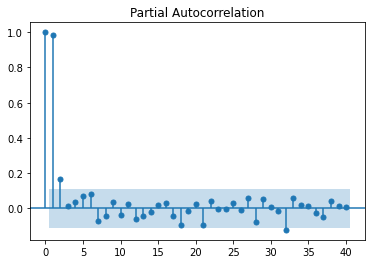

In [20]:
# extending lag for series 5 to further observe ACF decay

print("Series 5 Autocorrelation and Partial Autocorrelations")
acf_1 = plot_acf(series_5.values.squeeze(), lags=40)
pacf_1 = plot_pacf(series_5.values.squeeze(), lags=40)
print("\n")
print("---------------------")
print("\n")

In [50]:
# grid search ARIMA parameters for time series
import warnings
warnings.filterwarnings("ignore")
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

In [49]:
evaluate_arima_model(s1, (1,0,1))

AttributeError: 'numpy.ndarray' object has no attribute 'resid'

In [23]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

**To validate our model we will look at our model's residuals. The residuals are the difference between the observed data and the predicted value from our model. Ideally they will be a stationary series, looking like white noise if plotted, and normally distributed with a mean of 0. If our residuals show a trend or autocorrelation it means there is information we have failed to capture in our model. Here are tests we can use to check that our residuals are staitonary.**

In [30]:
import warnings
warnings.filterwarnings("ignore")
p_values = [0, 1, 6, 7, 11]
q_values = [0, 1, 6, 7, 11]
d_values = [0, 1]
# after using PACF and ACF plots to determine candidate p and q values, we will grid search viable options to generate best model
evaluate_models(s1, p_values, d_values, q_values)


ARIMA(0, 0, 0) MSE=0.903
ARIMA(0, 0, 1) MSE=0.916
ARIMA(0, 0, 6) MSE=0.908
ARIMA(0, 0, 7) MSE=0.917
ARIMA(0, 0, 11) MSE=0.953
ARIMA(0, 1, 0) MSE=1.749
ARIMA(0, 1, 1) MSE=0.948
ARIMA(0, 1, 6) MSE=0.983
ARIMA(0, 1, 7) MSE=0.991
ARIMA(0, 1, 11) MSE=1.037
ARIMA(1, 0, 0) MSE=0.915
ARIMA(1, 0, 1) MSE=0.912
ARIMA(1, 0, 6) MSE=0.906
ARIMA(1, 0, 7) MSE=0.963
ARIMA(1, 0, 11) MSE=1.013
ARIMA(1, 1, 0) MSE=1.432
ARIMA(1, 1, 1) MSE=0.946
ARIMA(1, 1, 6) MSE=0.947
ARIMA(1, 1, 7) MSE=0.991
ARIMA(1, 1, 11) MSE=1.032
ARIMA(6, 0, 0) MSE=0.912
ARIMA(6, 0, 1) MSE=0.899
ARIMA(6, 0, 6) MSE=0.941
ARIMA(6, 0, 7) MSE=0.985
ARIMA(6, 0, 11) MSE=1.038
ARIMA(6, 1, 0) MSE=1.103
ARIMA(6, 1, 1) MSE=0.975
ARIMA(6, 1, 6) MSE=0.975
ARIMA(6, 1, 7) MSE=1.021
ARIMA(6, 1, 11) MSE=1.079
ARIMA(7, 0, 0) MSE=0.937
ARIMA(7, 0, 1) MSE=0.949
ARIMA(7, 0, 6) MSE=0.969
ARIMA(7, 0, 7) MSE=0.951
ARIMA(7, 0, 11) MSE=1.060
ARIMA(7, 1, 0) MSE=1.105
ARIMA(7, 1, 1) MSE=0.979
ARIMA(7, 1, 6) MSE=0.987
ARIMA(7, 1, 7) MSE=0.999
ARIMA(7, 1, 11) MS

In [24]:
# fitting the best parameters from grid search for model 1
model_1 = ARIMA(s1, order=(6,0,1))
model_1_fit = model_1.fit()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  300
Model:                 ARIMA(6, 0, 1)   Log Likelihood                -413.102
Date:                Wed, 16 Mar 2022   AIC                            844.205
Time:                        11:24:00   BIC                            877.539
Sample:                             0   HQIC                           857.545
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0890      0.061      1.459      0.145      -0.031       0.209
ar.L1         -0.6610      0.177     -3.737      0.000      -1.008      -0.314
ar.L2          0.0250      0.081      0.307      0.7

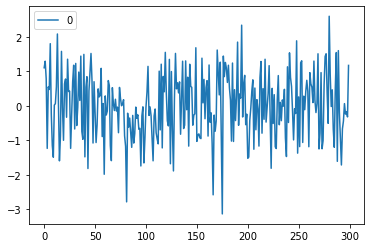

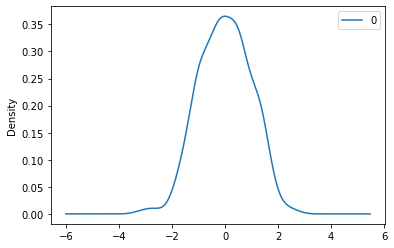

                0
count  300.000000
mean     0.000022
std      0.960598
min     -3.139799
25%     -0.696309
50%     -0.024567
75%      0.683568
max      2.602632


In [25]:
# summary of fit model
print(model_1_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_1_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

The ARIMA(6,0,1) fails the ljung-box test. Now checking other candidates...

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  300
Model:               ARIMA(11, 0, 11)   Log Likelihood                -403.532
Date:                Wed, 16 Mar 2022   AIC                            855.064
Time:                        13:14:55   BIC                            943.954
Sample:                             0   HQIC                           890.638
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0857      0.092      0.929      0.353      -0.095       0.267
ar.L1         -0.2786      0.661     -0.421      0.674      -1.575       1.018
ar.L2          0.2640      0.657      0.402      0.6

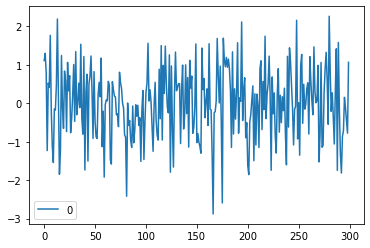

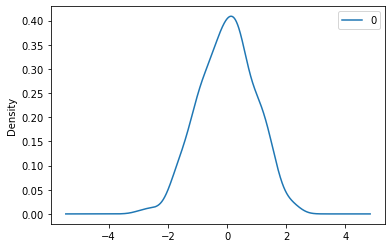

                0
count  300.000000
mean    -0.003269
std      0.930696
min     -2.879154
25%     -0.658764
50%      0.013225
75%      0.570427
max      2.262589


In [68]:
model_1 = ARIMA(s1, order=(11,0,11))
model_1_fit = model_1.fit()
# summary of fit model
print(model_1_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_1_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  300
Model:                          ARIMA   Log Likelihood                -418.605
Date:                Wed, 16 Mar 2022   AIC                            841.211
Time:                        13:15:21   BIC                            848.618
Sample:                             0   HQIC                           844.175
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0883      0.057      1.558      0.119      -0.023       0.199
sigma2         0.9539      0.079     12.021      0.000       0.798       1.109
Ljung-Box (L1) (Q):                   3.70   Jarque-

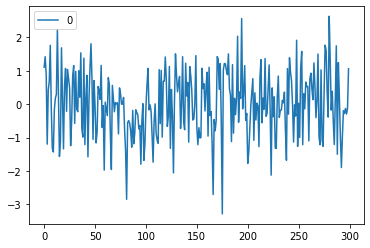

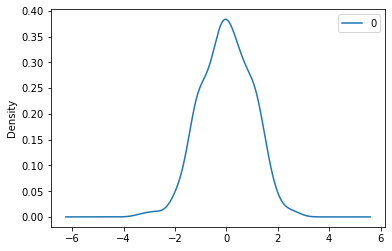

                0
count  300.000000
mean     0.000005
std      0.978321
min     -3.288750
25%     -0.705802
50%      0.001596
75%      0.703275
max      2.633659


In [70]:
# Tried multiple other models. All failed diagnostic checks. Assuming process is white noise for now
model_1 = ARIMA(s1, order=(0,0,0))
model_1_fit = model_1.fit()
# summary of fit model
print(model_1_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_1_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

I was unable to find a model that more accurate described the time series better than white noise.

Final S1 model:
Y(t) = 0.088 + e(t) 

In [40]:
# checking potential significant coefficients as determined by S2 ACF and PACF plots 
# identified a single significant spike in the PACF and then a drop off 
# The ACF and PACF plots should be considered together to define the process. 
# For the AR process, we expect that the ACF plot will gradually decrease and simultaneously 
# the PACF should have a sharp drop after p significant lags. 
# this is what was observed for s2 with a sharp drop after p=1 lags 
# will test AR(1) and some variations of (1,0,X)
# series gave strong indications of stationarity but there was questions so we will try w both d=1 and d=0 
import warnings
warnings.filterwarnings("ignore")
p_values = [1]
q_values = [0, 1, 6, 7]
d_values = [0, 1]
# after using PACF and ACF plots to determine candidate p and q values, we will grid search viable options to generate best model
evaluate_models(s1, p_values, d_values, q_values)

ARIMA(1, 0, 0) MSE=0.915
ARIMA(1, 0, 1) MSE=0.912
ARIMA(1, 0, 6) MSE=0.906
ARIMA(1, 0, 7) MSE=0.963
ARIMA(1, 1, 0) MSE=1.432
ARIMA(1, 1, 1) MSE=0.946
ARIMA(1, 1, 6) MSE=0.947
ARIMA(1, 1, 7) MSE=0.991
Best ARIMA(1, 0, 6) MSE=0.906


In [27]:
# fitting the best parameters from grid search for model 2
model_2 = ARIMA(s2, order=(1,0,6))
model_2_fit = model_2.fit()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  300
Model:                 ARIMA(1, 0, 6)   Log Likelihood                -439.365
Date:                Wed, 16 Mar 2022   AIC                            896.729
Time:                        11:24:59   BIC                            930.063
Sample:                             0   HQIC                           910.069
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5389      0.324      7.846      0.000       1.905       3.173
ar.L1          0.8554      0.127      6.741      0.000       0.607       1.104
ma.L1         -0.0338      0.141     -0.239      0.8

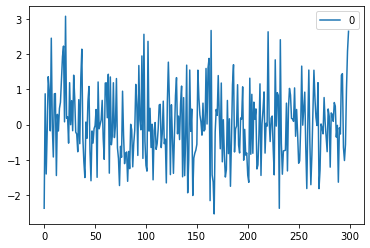

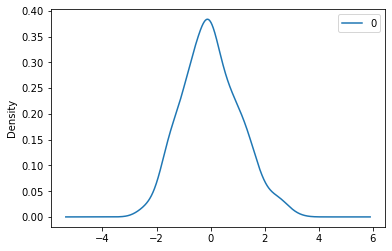

                0
count  300.000000
mean     0.005895
std      1.052445
min     -2.541259
25%     -0.748076
50%     -0.043875
75%      0.688813
max      3.084708


In [28]:
# summary of fit model
print(model_2_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_2_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  300
Model:                 ARIMA(1, 0, 5)   Log Likelihood                -439.431
Date:                Wed, 16 Mar 2022   AIC                            894.862
Time:                        13:52:59   BIC                            924.493
Sample:                             0   HQIC                           906.720
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5403      0.321      7.920      0.000       1.912       3.169
ar.L1          0.8651      0.116      7.489      0.000       0.639       1.091
ma.L1         -0.0431      0.136     -0.317      0.7

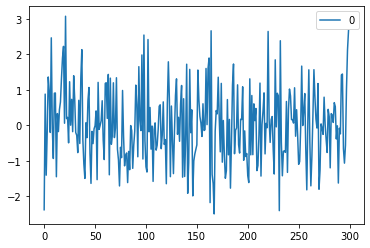

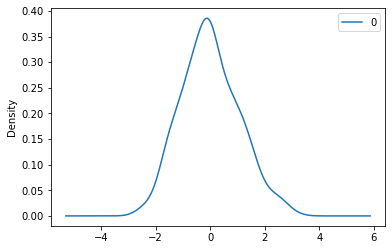

                0
count  300.000000
mean     0.005689
std      1.052691
min     -2.498788
25%     -0.752278
50%     -0.076898
75%      0.706801
max      3.074803


In [84]:
model_2 = ARIMA(s2, order=(1,0,5))
model_2_fit = model_2.fit()
# summary of fit model
print(model_2_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_2_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  300
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -441.885
Date:                Tue, 15 Mar 2022   AIC                            889.769
Time:                        23:02:38   BIC                            900.881
Sample:                             0   HQIC                           894.216
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5354      0.312      8.116      0.000       1.923       3.148
ar.L1          0.8041      0.035     23.159      0.000       0.736       0.872
sigma2         1.1102      0.100     11.083      0.0

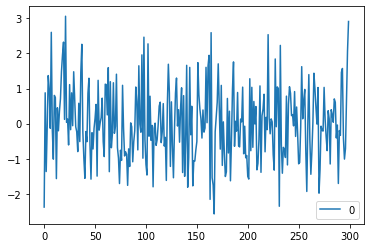

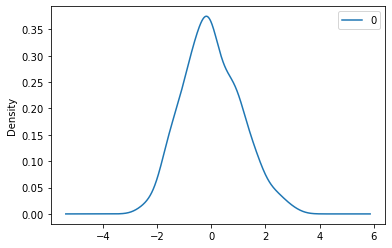

                0
count  300.000000
mean     0.006354
std      1.061180
min     -2.571708
25%     -0.744760
50%     -0.075340
75%      0.744691
max      3.057788


In [47]:
# fitting the best parameters from grid search for model 2
# first positive result for Ljung-box Q statistic (>0.05) * 
model_2 = ARIMA(s2, order=(1,0,0))
model_2_fit = model_2.fit()
# summary of fit model
print(model_2_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_2_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())



It would appear that series 2 can be modeled with an AR(1) process. The jarque-bera test indicates that the residuals are normally distributed which is confirmed with the graph of the residuals and the ljung box p-value is >0.05 therefore we fail to reject the null that our model does not show lack of fit (aka fail to reject the hypothesis that fits). 

Final AR(1) S2 model in standard form:
Y(t) = 2.54 + 0.805*Y(t-1) + e(t) --- w/ e~N(0,sigma squared) 

In [51]:
# Now analyzing series 3
# Appears stationary upon visual examination
# ADF and KPSS appear to confirm stationiarity 
# potentially significant ACF spikes at 1,2 and maybe 11
# potentially significant PACF spikes at 1, 2, 3, 11
# will proceed with grid search of parameters

import warnings
warnings.filterwarnings("ignore")
p_values = [0, 1, 2, 11]
q_values = [0, 1, 3, 11]
d_values = [0]

# no discernable pattern in autocorrelation patterns. Series could be white noise.
# we will use a grid search of potentially viable ARIMA orders to attempt to verify
evaluate_models(s1, p_values, d_values, q_values)


ARIMA(0, 0, 0) MSE=0.903
ARIMA(0, 0, 1) MSE=0.916
ARIMA(0, 0, 3) MSE=0.918
ARIMA(0, 0, 11) MSE=0.953
ARIMA(1, 0, 0) MSE=0.915
ARIMA(1, 0, 1) MSE=0.912
ARIMA(1, 0, 3) MSE=0.922
ARIMA(1, 0, 11) MSE=1.013
ARIMA(2, 0, 0) MSE=0.910
ARIMA(2, 0, 1) MSE=0.914
ARIMA(2, 0, 3) MSE=0.940
ARIMA(2, 0, 11) MSE=1.001
ARIMA(11, 0, 0) MSE=0.965
ARIMA(11, 0, 1) MSE=0.963
ARIMA(11, 0, 3) MSE=0.989
ARIMA(11, 0, 11) MSE=1.051
Best ARIMA(0, 0, 0) MSE=0.903


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  300
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -447.193
Date:                Wed, 16 Mar 2022   AIC                            900.385
Time:                        13:28:33   BIC                            911.497
Sample:                             0   HQIC                           904.832
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0152      0.089      0.171      0.864      -0.159       0.189
ar.L1          0.2774      0.056      4.935      0.000       0.167       0.388
sigma2         1.1539      0.091     12.653      0.0

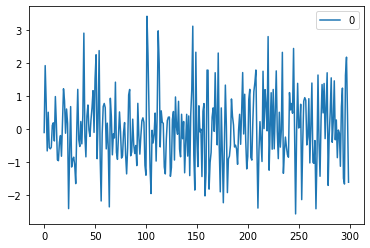

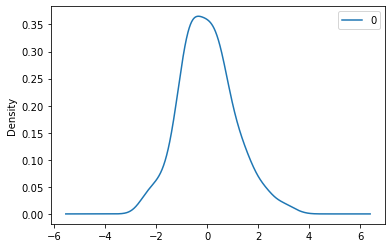

                0
count  300.000000
mean     0.000102
std      1.075989
min     -2.566738
25%     -0.762592
50%     -0.077370
75%      0.640307
max      3.409887


In [81]:
# grid search indicates that ARIMA(0,0,0) gave best MSE. The series appears to be white noise.
# fitting ARIMA(2,0,0) (2nd best MSE) to check diagnostics 

# first positive result for Ljung-box Q statistic (>0.05) * 
model_3 = ARIMA(s3, order=(1,0,0))
model_3_fit = model_3.fit()
# summary of fit model
print(model_3_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_3_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  300
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -433.809
Date:                Wed, 16 Mar 2022   AIC                            875.618
Time:                        13:53:53   BIC                            890.434
Sample:                             0   HQIC                           881.547
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0135      0.067      0.202      0.840      -0.118       0.145
ar.L1          0.3609      0.057      6.366      0.000       0.250       0.472
ar.L2         -0.2943      0.058     -5.057      0.0

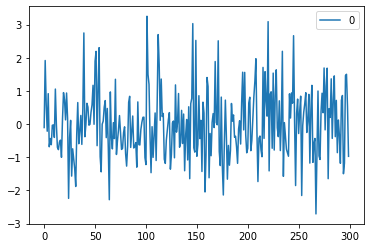

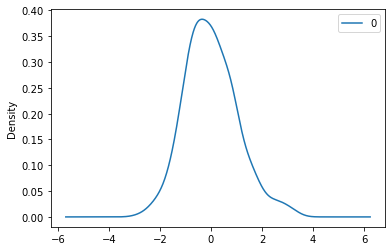

                0
count  300.000000
mean     0.001849
std      1.029249
min     -2.708793
25%     -0.715787
50%     -0.040485
75%      0.657343
max      3.253672


In [85]:
model_3 = ARIMA(s3, order=(2,0,0))
model_3_fit = model_3.fit()
# summary of fit model
print(model_3_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_3_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

AR(2) appears to offer the best estimate for the third process. It passes the ljung-box test and the residuals appear to be normally distributed in the graph and the Jarque-Bera results support this. The AIC and BIC scores are superior to the AR(1) process thus my selecting the AR(2) over the AR(1)

Final AR(2) S3 model in standard form:

Y(t) = 0.014 + 0.361Y(t-1) + -0.294Y(t-2) + e(t) --- w/ e~N(0,sigma squared) 

In [54]:
# Now analyzing series 4
# ADF, KPSS, and a visual examination indicate the series is stationary
# a sinousoidal decay in the ACF and a sharp cutoff in the PACF indicate the series
# could be modeled with an AR process 
# grid-searching candidate p and q values ...

import warnings
warnings.filterwarnings("ignore")
p_values = [0, 1, 2]
q_values = [0,1]
d_values = [0,1]
# after using PACF and ACF plots to determine candidate p and q values, we will grid search viable options to generate best model
evaluate_models(s1, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=0.903
ARIMA(0, 0, 1) MSE=0.916
ARIMA(0, 1, 0) MSE=1.749
ARIMA(0, 1, 1) MSE=0.948
ARIMA(1, 0, 0) MSE=0.915
ARIMA(1, 0, 1) MSE=0.912
ARIMA(1, 1, 0) MSE=1.432
ARIMA(1, 1, 1) MSE=0.946
ARIMA(2, 0, 0) MSE=0.910
ARIMA(2, 0, 1) MSE=0.914
ARIMA(2, 1, 0) MSE=1.246
ARIMA(2, 1, 1) MSE=0.949
Best ARIMA(0, 0, 0) MSE=0.903


In [55]:
# repeating grid search for series 4 with different parameters
# first grid search indicated series is white noise -> (0,0,0) 
import warnings
warnings.filterwarnings("ignore")
p_values = [0, 1, 2, 10]
q_values = [0,10,11,12,13]
d_values = [0,1]
# after using PACF and ACF plots to determine candidate p and q values, we will grid search viable options to generate best model
evaluate_models(s1, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=0.903
ARIMA(0, 0, 10) MSE=0.949
ARIMA(0, 0, 11) MSE=0.953
ARIMA(0, 0, 12) MSE=0.966
ARIMA(0, 0, 13) MSE=0.972
ARIMA(0, 1, 0) MSE=1.749
ARIMA(0, 1, 10) MSE=1.030
ARIMA(0, 1, 11) MSE=1.037
ARIMA(0, 1, 12) MSE=1.016
ARIMA(0, 1, 13) MSE=1.025
ARIMA(1, 0, 0) MSE=0.915
ARIMA(1, 0, 10) MSE=1.001
ARIMA(1, 0, 11) MSE=1.013
ARIMA(1, 0, 12) MSE=1.003
ARIMA(1, 0, 13) MSE=1.007
ARIMA(1, 1, 0) MSE=1.432
ARIMA(1, 1, 10) MSE=1.024
ARIMA(1, 1, 11) MSE=1.032
ARIMA(1, 1, 12) MSE=1.037
ARIMA(1, 1, 13) MSE=1.042
ARIMA(2, 0, 0) MSE=0.910
ARIMA(2, 0, 10) MSE=1.011
ARIMA(2, 0, 11) MSE=1.001
ARIMA(2, 0, 12) MSE=1.018
ARIMA(2, 0, 13) MSE=1.034
ARIMA(2, 1, 0) MSE=1.246
ARIMA(2, 1, 10) MSE=0.997
ARIMA(2, 1, 11) MSE=1.064
ARIMA(2, 1, 12) MSE=1.089
ARIMA(2, 1, 13) MSE=1.084
ARIMA(10, 0, 0) MSE=0.954
ARIMA(10, 0, 10) MSE=1.053
ARIMA(10, 0, 11) MSE=1.054
ARIMA(10, 0, 12) MSE=1.052
ARIMA(10, 0, 13) MSE=1.077
ARIMA(10, 1, 0) MSE=1.055
ARIMA(10, 1, 10) MSE=1.114
ARIMA(10, 1, 11) MSE=1.161
ARIMA(10, 1,

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  300
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -562.450
Date:                Wed, 16 Mar 2022   AIC                           1130.900
Time:                        13:00:49   BIC                           1142.011
Sample:                             0   HQIC                          1135.347
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6497      0.490     13.561      0.000       5.689       7.611
ar.L1          0.8127      0.031     26.184      0.000       0.752       0.873
sigma2         2.4798      0.205     12.087      0.0

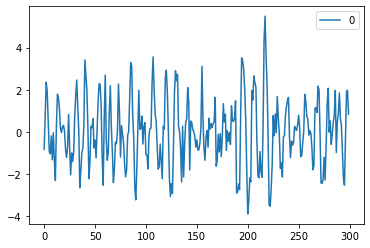

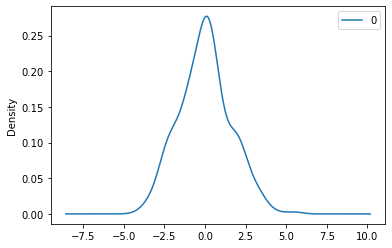

                0
count  300.000000
mean     0.002249
std      1.577858
min     -3.883935
25%     -0.998030
50%      0.034100
75%      0.842069
max      5.481185


In [57]:
# ARIMA(0,0,0) still has lowest MSE but will fit a few other ARIMAs to check fit
# Namely, the AR(1) and AR(2) processes 
# checking AR(1) first

model_4 = ARIMA(s4, order=(1,0,0))
model_4_fit = model_4.fit()
# summary of fit model
print(model_4_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_4_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  300
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -434.490
Date:                Wed, 16 Mar 2022   AIC                            876.979
Time:                        13:01:29   BIC                            891.794
Sample:                             0   HQIC                           882.908
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6266      0.185     35.893      0.000       6.265       6.988
ar.L1          1.4294      0.038     37.223      0.000       1.354       1.505
ar.L2         -0.7554      0.038    -19.709      0.0

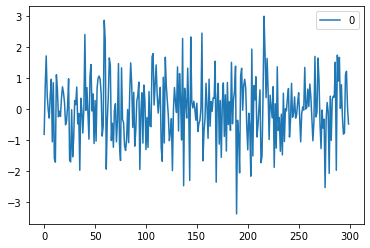

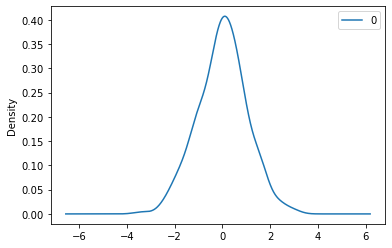

                0
count  300.000000
mean     0.000279
std      1.028117
min     -3.368141
25%     -0.679737
50%      0.020102
75%      0.681069
max      2.998604


In [58]:
model_4 = ARIMA(s4, order=(2,0,0))
model_4_fit = model_4.fit()
# summary of fit model
print(model_4_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_4_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  300
Model:                          ARIMA   Log Likelihood                -725.131
Date:                Wed, 16 Mar 2022   AIC                           1454.261
Time:                        13:01:55   BIC                           1461.669
Sample:                             0   HQIC                          1457.226
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6302      0.158     41.919      0.000       6.320       6.940
sigma2         7.3620      0.564     13.057      0.000       6.257       8.467
Ljung-Box (L1) (Q):                 200.45   Jarque-

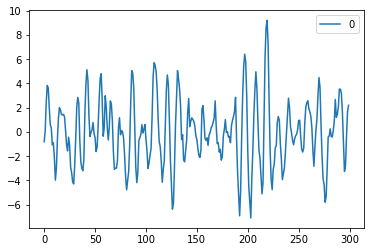

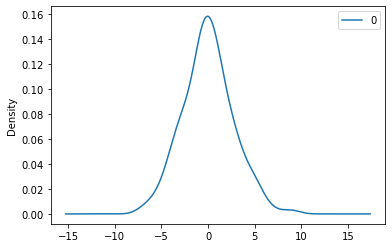

                0
count  300.000000
mean     0.000005
std      2.717827
min     -7.092268
25%     -1.622172
50%     -0.084507
75%      1.566120
max      9.209079


In [59]:
model_4 = ARIMA(s4, order=(0,0,0))
model_4_fit = model_4.fit()
# summary of fit model
print(model_4_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_4_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

For process 4, the AR(2) appears to provide the best model for the data. The AIC and BIC for the AR(2) are superior to the next best contender in the AR(1) and it passes the ljung-box test. The PACF and ACF structures also point to an AR process. The residuals of the model also appear normally distributed judging by the graph and the jarque-bera results. Also, all coefficients have signficant p-values.

Final S4 model:
Y(t) = 6.627 + 1.429Y(t-1) + -0.755Y(t-1) + e(t)


**moving to S5 analysis** 

I ran a grid search in a separate notebook to check the MSE of potential ARIMA orders after doing a quick visual analysis of the PACF and ACF functions. The (0,0,0) again had the lowest tested MSE, but (0,0,1), (0,1,1), (1,0,1), and (1,0,0) were promising. The series was clearly non-stationary judging by the non-constant mean and failing the KPSS test for stationarity. Because of the non-stationarity, we will 

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  300
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -582.393
Date:                Wed, 16 Mar 2022   AIC                           1168.785
Time:                        14:14:12   BIC                           1176.186
Sample:                             0   HQIC                          1171.748
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2891      0.057     -5.039      0.000      -0.401      -0.177
sigma2         2.8789      0.268     10.761      0.000       2.355       3.403
Ljung-Box (L1) (Q):                   0.07   Jarque-

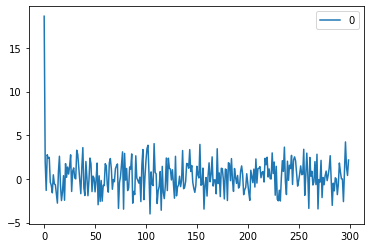

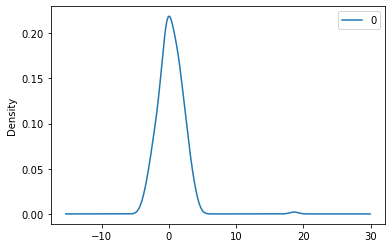

                0
count  300.000000
mean     0.304112
std      1.986651
min     -4.010543
25%     -0.798097
50%      0.194076
75%      1.439881
max     18.619710


In [86]:
# testing d=1 MA(1) first 
model_5 = ARIMA(s5, order=(0,1,1))
model_5_fit = model_5.fit()
# summary of fit model
print(model_5_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_5_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  300
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -582.360
Date:                Wed, 16 Mar 2022   AIC                           1170.720
Time:                        14:15:16   BIC                           1181.821
Sample:                             0   HQIC                          1175.163
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.201      0.231      0.818      -0.348       0.441
ma.L1         -0.3308      0.186     -1.776      0.076      -0.696       0.034
sigma2         2.8783      0.269     10.714      0.0

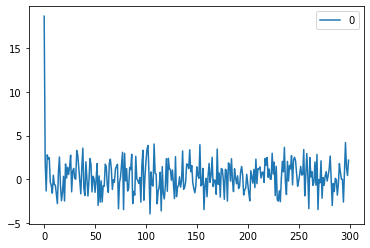

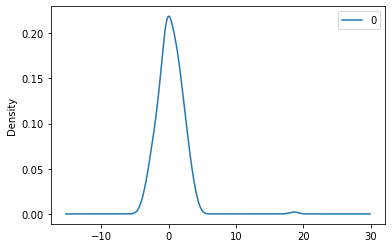

                0
count  300.000000
mean     0.307088
std      1.986031
min     -3.950933
25%     -0.795879
50%      0.200782
75%      1.455632
max     18.619710


In [90]:
# testing d=1 MA(1) first 
model_5 = ARIMA(s5, order=(1,1,1))
model_5_fit = model_5.fit()
# summary of fit model
print(model_5_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_5_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  300
Model:                ARIMA(1, 1, 22)   Log Likelihood                -570.383
Date:                Wed, 16 Mar 2022   AIC                           1188.766
Time:                        14:17:30   BIC                           1277.576
Sample:                             0   HQIC                          1224.312
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0166     14.906      0.001      0.999     -29.199      29.232
ma.L1         -0.2917     14.899     -0.020      0.984     -29.493      28.910
ma.L2         -0.0050      4.101     -0.001      0.9

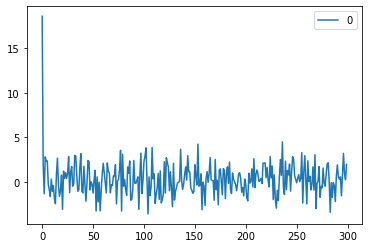

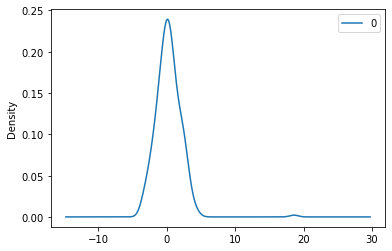

                0
count  300.000000
mean     0.288607
std      1.932579
min     -3.612296
25%     -0.909278
50%      0.180225
75%      1.277230
max     18.619710


In [94]:
# testing d=1 MA(1) first 
model_5 = ARIMA(s5, order=(1,1,22))
model_5_fit = model_5.fit()
# summary of fit model
print(model_5_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_5_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

The MA(1) with d=1 appears to be the best choice for modeling the data. The ljung-box test indicates the model provides a good fit, the residuals are normally distributed per JB test and visual analysis, and the MA coefficient has a significant p-value. Model summary does not provide intercept presumably because the differenced model has mean zero. 

Final S5 Model:
Y(t) = e(t) + -0.289e(t-1) 
